<a href="https://colab.research.google.com/github/SagarThomas24/ML_projects/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd

'/content'

In [1]:
#task1
!pip install keras
import os
import pandas as pd
import numpy as np
import tensorflow as tf


In [3]:
df = pd.read_csv(f'/content/drive/MyDrive/MIMIC.zip (Unzipped Files)/Admission_Predict_A3.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape



(500, 9)

In [9]:
print(df[df['Chance of Admit '] < 0.3])

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


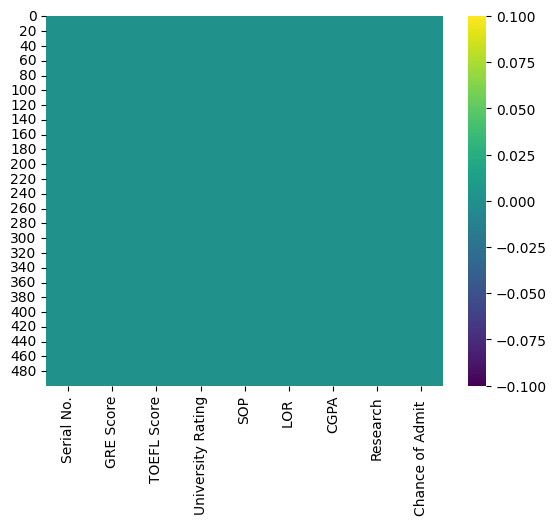

In [10]:


# Check for missing values
print(df.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()


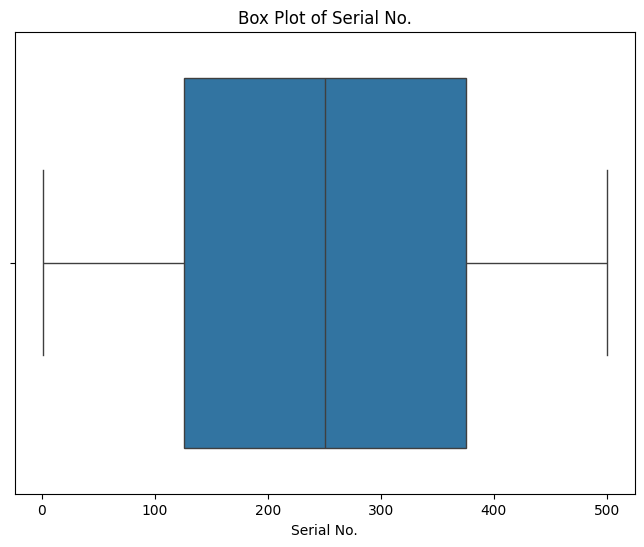

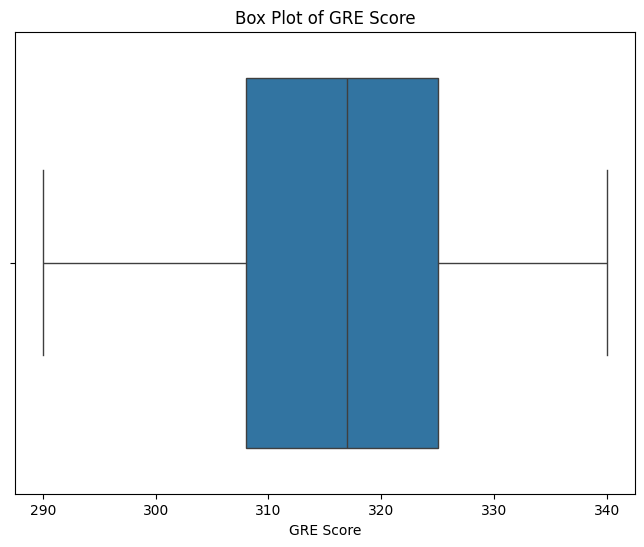

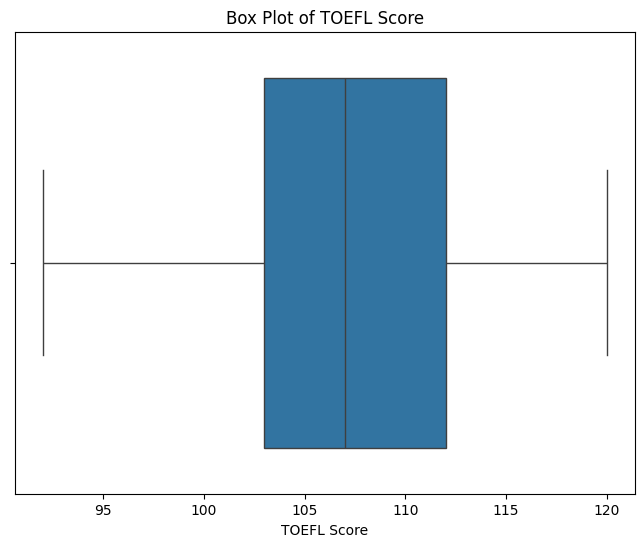

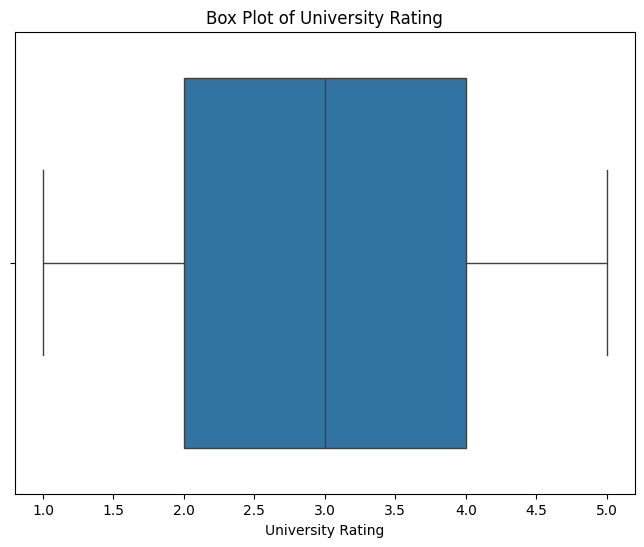

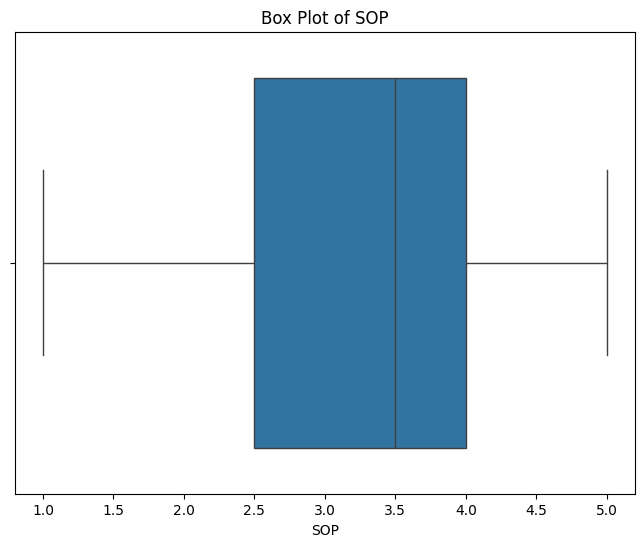

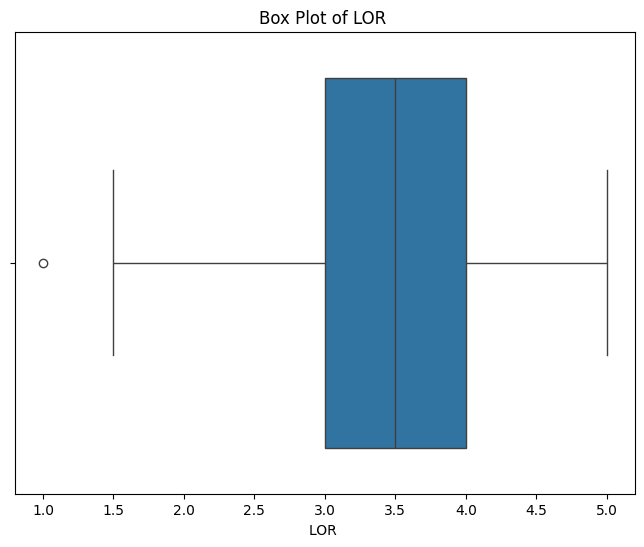

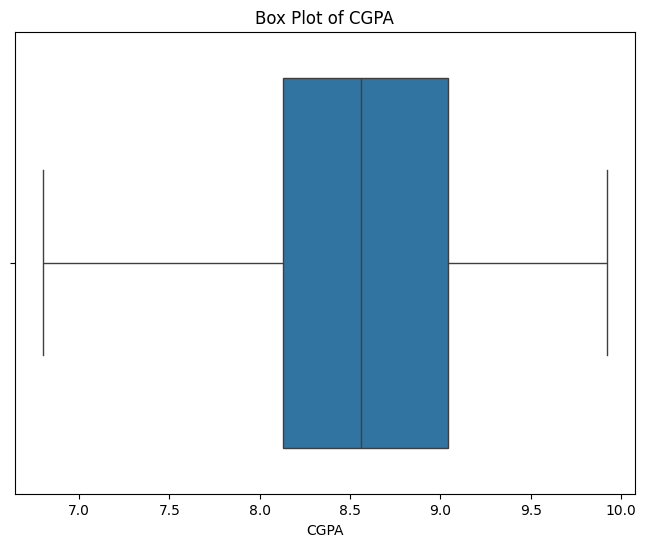

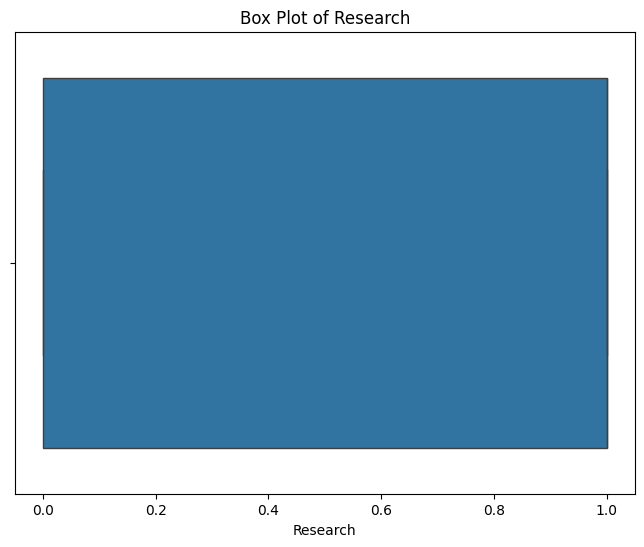

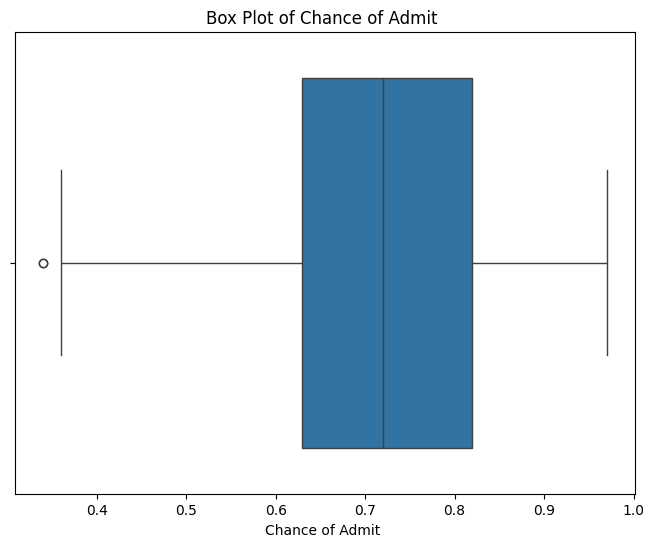

In [ ]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

In [ ]:


# Identify outliers using box plots
columns=df.columns
for col in columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1 - 1.5 * IQR
  upper_bound=Q3 + 1.5 * IQR

  outliers=df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  if not outliers.empty:
    print(f"Outliers detected in column '{col}':")
    print(outliers[[col]])
    print("\n")

Outliers detected in column 'LOR ':
     LOR 
347   1.0


Outliers detected in column 'Chance of Admit ':
     Chance of Admit 
92               0.34
376              0.34




In [ ]:
#task 2

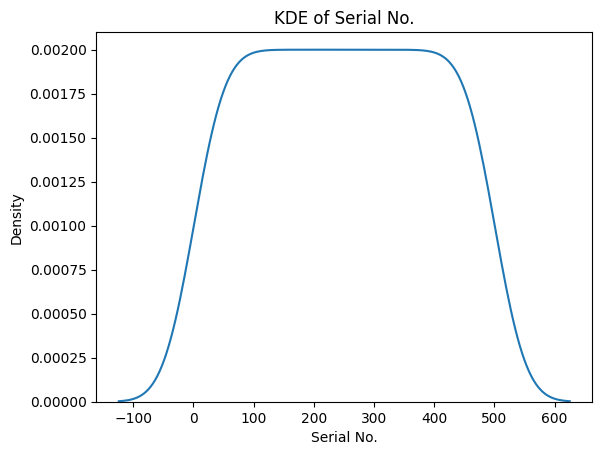

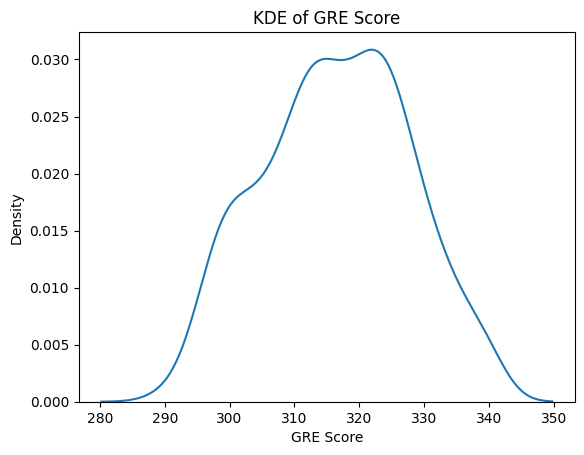

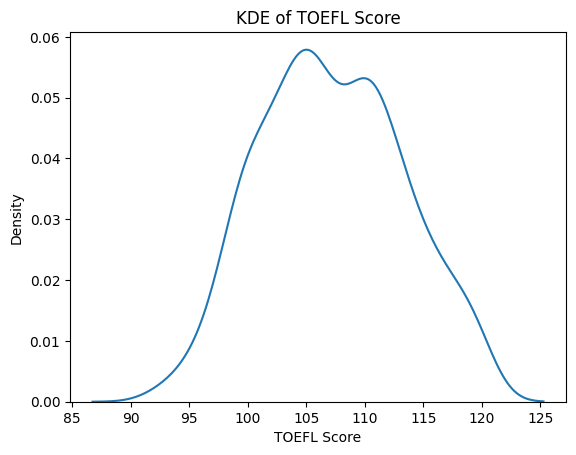

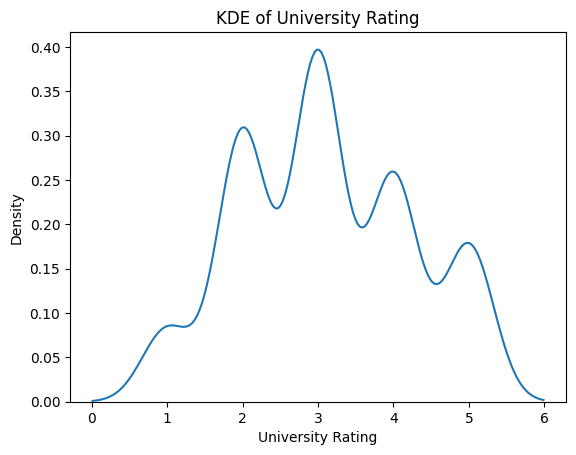

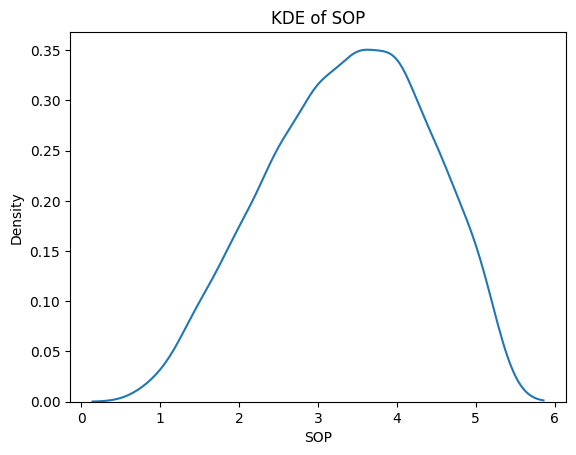

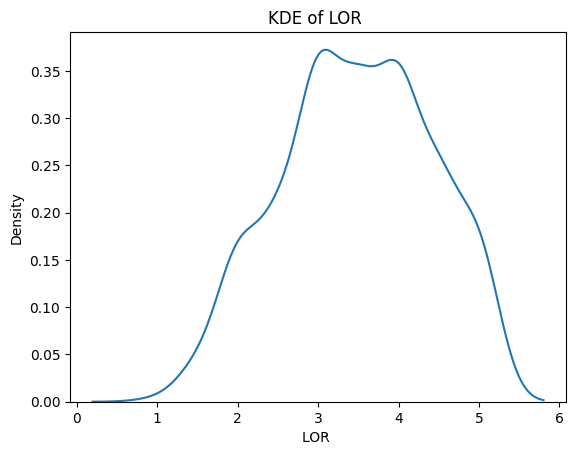

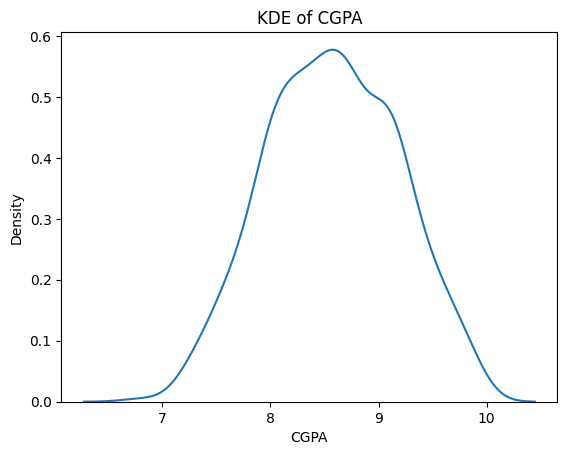

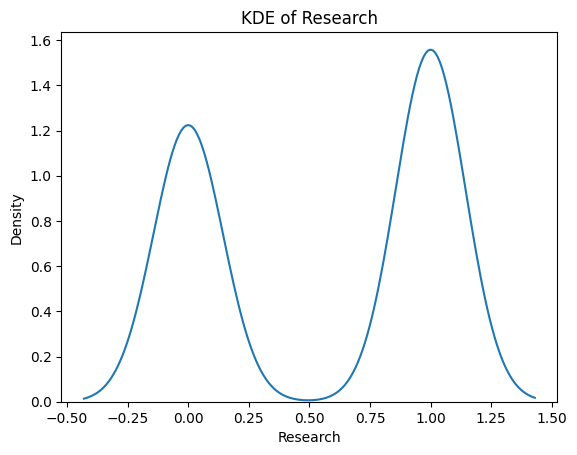

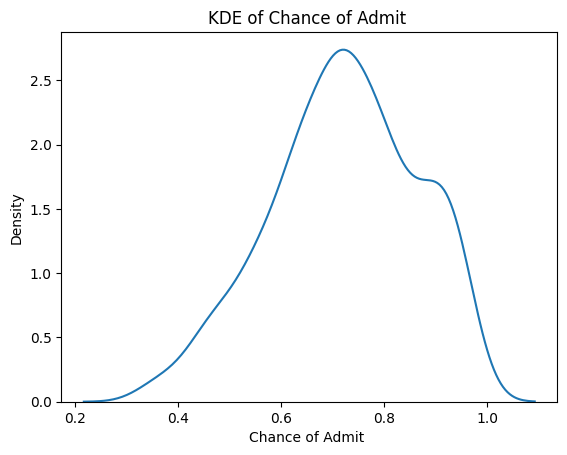

In [ ]:


for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure()
    sns.kdeplot(df[column])
    plt.title(f'KDE of {column}')
    plt.show()


In [ ]:

max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)


Maximum values for each feature:
Serial No.           500.00
GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.92
Research               1.00
Chance of Admit        0.97
dtype: float64

Minimum values for each feature:
Serial No.             1.00
GRE Score            290.00
TOEFL Score           92.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   6.80
Research               0.00
Chance of Admit        0.34
dtype: float64


In [ ]:

df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns = df.columns.str.strip()

# Separate the features and target
features = df.drop(columns=['Chance of Admit'])  # Exclude 'Chance of Admit'
target = df['Chance of Admit']  # Store the target separately

features_to_standard_scale = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA']
features_to_minmax_scale = ['University Rating']
binary_features = ['Research']  # No scaling needed

# Define the transformations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), features_to_standard_scale),
        ('minmax_scaler', MinMaxScaler(), features_to_minmax_scale),
        ('passthrough', 'passthrough', binary_features)
    ]
)

df_scaled = preprocessor.fit_transform(features)


scaled_columns = features_to_standard_scale + features_to_minmax_scale + binary_features
df_scaled = pd.DataFrame(df_scaled, columns=scaled_columns)


df_scaled['Chance of Admit'] = target.values


df_scaled


,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating,Research,Chance of Admit
0,1.819238,1.778865,1.137360,1.098944,1.776806,0.75,1.0,0.92
1,0.667148,-0.031601,0.632315,1.098944,0.485859,0.75,1.0,0.76
2,-0.041830,-0.525364,-0.377773,0.017306,-0.954043,0.50,1.0,0.72
3,0.489904,0.462163,0.127271,-1.064332,0.154847,0.50,1.0,0.80
4,-0.219074,-0.689952,-1.387862,-0.523513,-0.606480,0.25,0.0,0.65
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.137360,0.558125,0.734118,1.00,1.0,0.87
496,1.819238,1.614278,1.642404,1.639763,2.140919,1.00,1.0,0.96
497,1.198882,2.108041,1.137360,1.639763,1.627851,1.00,1.0,0.93
498,-0.396319,-0.689952,0.632315,1.639763,-0.242367,0.75,0.0,0.73


'''2. Improved Convergence and Training Speed
Scaling features can make training faster and more stable, especially in gradient-based optimizers:

Faster Gradient Descent Convergence: Scaling makes the cost surface smoother, leading to faster convergence in algorithms like neural networks and linear models.
Prevents Divergence: Without scaling, large features might cause too large updates in gradient descent, which can lead to divergence or failure in finding the optimal solution'''


In [ ]:
#task 3

In [ ]:

bins = [0.3, 0.5, 0.7, 1]
labels = ['Low', 'Medium', 'High']
df_scaled['Chance of Admit Category'] = pd.cut(df_scaled['Chance of Admit'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame with the discretized target variable
df_scaled


,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating,Research,Chance of Admit,Chance of Admit Category
0,1.819238,1.778865,1.137360,1.098944,1.776806,0.75,1.0,0.92,High
1,0.667148,-0.031601,0.632315,1.098944,0.485859,0.75,1.0,0.76,High
2,-0.041830,-0.525364,-0.377773,0.017306,-0.954043,0.50,1.0,0.72,High
3,0.489904,0.462163,0.127271,-1.064332,0.154847,0.50,1.0,0.80,High
4,-0.219074,-0.689952,-1.387862,-0.523513,-0.606480,0.25,0.0,0.65,Medium
...,...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.137360,0.558125,0.734118,1.00,1.0,0.87,High
496,1.819238,1.614278,1.642404,1.639763,2.140919,1.00,1.0,0.96,High
497,1.198882,2.108041,1.137360,1.639763,1.627851,1.00,1.0,0.93,High
498,-0.396319,-0.689952,0.632315,1.639763,-0.242367,0.75,0.0,0.73,High


In [ ]:
print(df_scaled['Chance of Admit Category'].unique())

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']


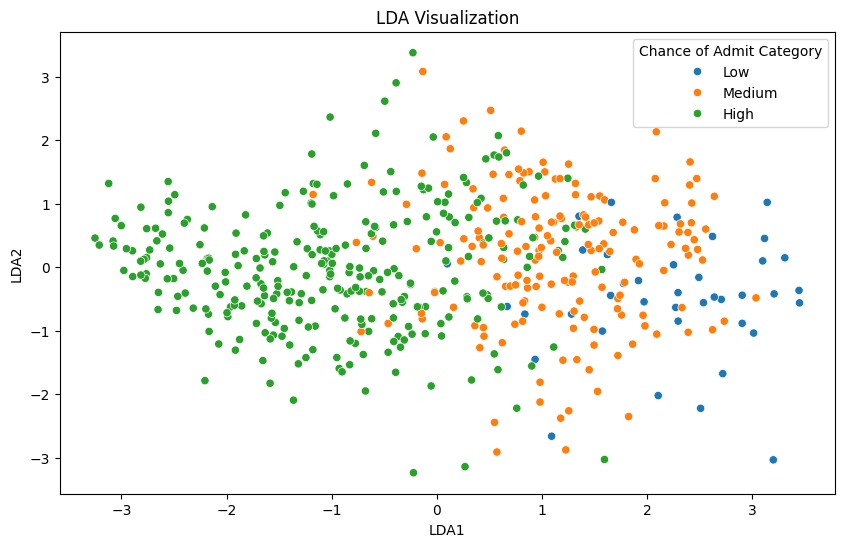

In [ ]:
#  Apply LDA: Use the categorized target variable to perform Linear Discriminant Analysis (LDA) on the input
# features. LDA will reduce the dimensionality of the feature space by projecting the data into a lower-dimensional
# space that maximizes class separability.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate features and target for LDA
X = df_scaled.drop(['Chance of Admit', 'Chance of Admit Category'], axis=1)
y = df_scaled['Chance of Admit Category']

# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components

# Fit and transform the data
X_lda = lda.fit_transform(X, y)

# Create a new DataFrame with the LDA components
df_lda = pd.DataFrame(data=X_lda, columns=['LDA1', 'LDA2'])
df_lda['Chance of Admit Category'] = y


plt.figure(figsize=(10, 6))
sns.scatterplot(x='LDA1', y='LDA2', hue='Chance of Admit Category', data=df_lda)
plt.title('LDA Visualization')
plt.show()



Explained Variance Ratio: [0.97852952 0.02147048]


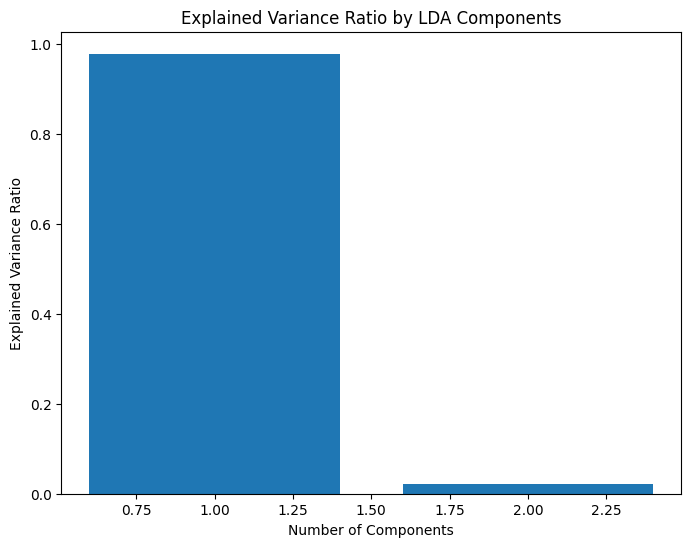

Original dataset shape: (500, 7)
Reduced dataset shape: (500, 2)


In [ ]:

explained_variance_ratio = lda.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by LDA Components")
plt.show()


# Evaluate the influence of dimensionality reduction
print("Original dataset shape:", X.shape)
print("Reduced dataset shape:", X_lda.shape)


# We can evaluate the explained variance ratio to justify the number of components retained.
# The explained variance ratio tells us the proportion of the variance in the data that is explained by each component.
# We typically want to retain enough components to explain a significant portion of the variance, e.g., 95% or more.


# In this case, the explained variance ratio is close to 1, which means that the first component explains almost all the variance.
# Therefore, we could potentially retain only the first component without losing much information.
# However, it's also important to consider the number of classes in our target variable.
# If we have more classes, we might need to retain more components.
# In this case, we have three classes, and we retained two components.
# We can see how LDA influences the dataset by looking at the shape of the data before and after applying LDA.


# We can see that the number of dimensions has reduced from 7 to 2.
# This means that we have reduced the dimensionality of our data.
# Dimensionality reduction can be beneficial in reducing computational costs,
# improving model performance by removing noise and redundant information,
# and visualizing the data more easily.

# However, it's important to note that dimensionality reduction can also lead to a loss of information.
# In this case, we can see that the explained variance ratio is very high,
# which means that we haven't lost much information by reducing the dimensionality.

# In summary, we chose the number of components based on the explained variance ratio,
# and it appears that we were able to effectively reduce the dimensionality of the data
# without losing much information.
# This dimensionality reduction helped to reduce computational costs and improve visualization of the data.

In [ ]:


import tensorflow as tf

# Separate features and target for linear regression
X_lr = df_lda[['LDA1', 'LDA2']]
y_lr = df_scaled['Chance of Admit']

# Convert data to TensorFlow tensors
X_tensor = tf.convert_to_tensor(X_lr, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y_lr, dtype=tf.float32)

# Define the linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Define the loss function (mean squared error)
loss_fn = tf.keras.losses.MeanSquaredError()

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
  with tf.GradientTape() as tape:
    y_pred = model(X_tensor)
    loss = loss_fn(y_tensor, y_pred)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  if (epoch + 1) % 10 == 0:
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy()}")

# Evaluate the model
y_pred = model(X_tensor).numpy()
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_lr, y_pred)
r2 = r2_score(y_lr, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# (2) scikit-learn:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_sklearn = regressor.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("\nScikit-learn Linear Regression:")
print("Mean Squared Error:", mse_sklearn)
print("R-squared:", r2_sklearn)

# Compare the performance of the two approaches and analyze their results.


Epoch 10, Loss: 2.303269386291504
Epoch 20, Loss: 1.0905348062515259
Epoch 30, Loss: 0.5590370297431946
Epoch 40, Loss: 0.30959683656692505
Epoch 50, Loss: 0.1830751746892929
Epoch 60, Loss: 0.11384164541959763
Epoch 70, Loss: 0.0734519213438034
Epoch 80, Loss: 0.048739735037088394
Epoch 90, Loss: 0.03312485292553902
Epoch 100, Loss: 0.023055078461766243
Mean Squared Error: 0.022265679744221507
R-squared: -0.11996049732059255

Scikit-learn Linear Regression:
Mean Squared Error: 0.0038610951687171537
R-squared: 0.8111933902827798


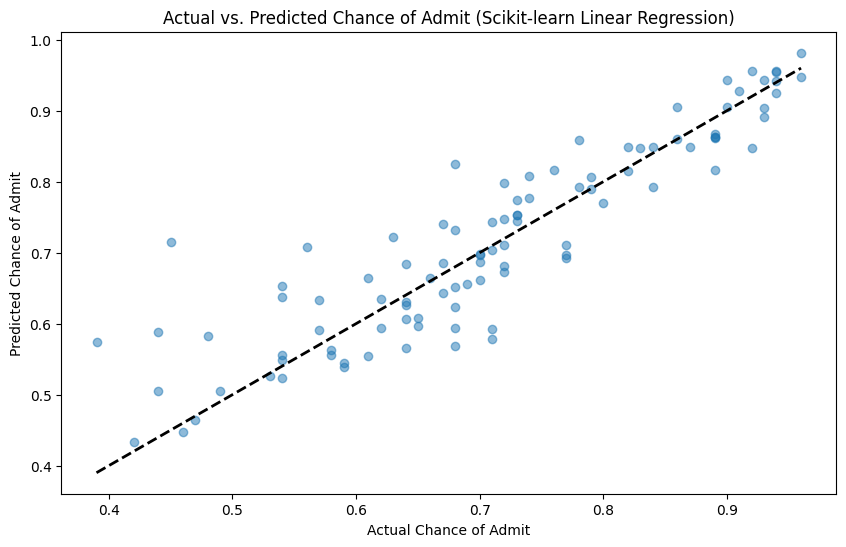

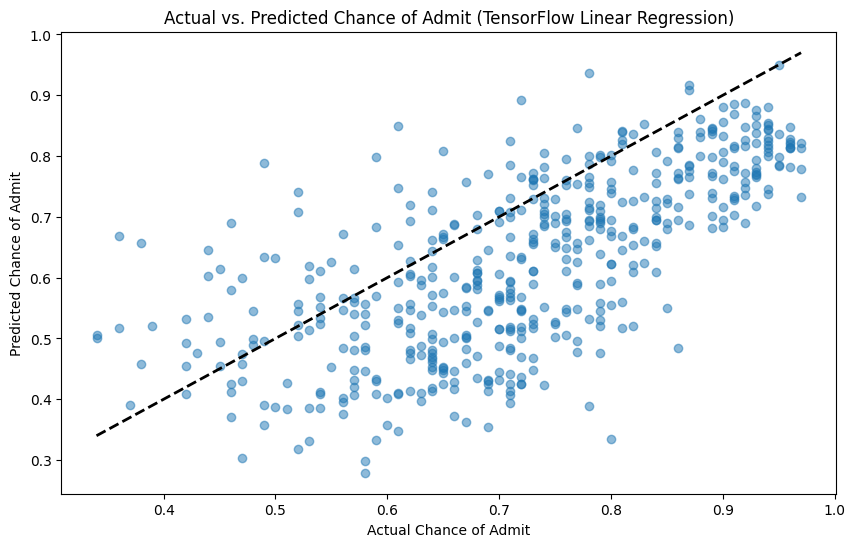

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Chance of Admit (Scikit-learn Linear Regression)')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_lr, y_pred, alpha=0.5)
plt.plot([y_lr.min(), y_lr.max()], [y_lr.min(), y_lr.max()], 'k--', lw=2)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Chance of Admit (TensorFlow Linear Regression)')
plt.show()



In [ ]:

import tensorflow as tf

X_class = df_scaled.drop(['Chance of Admit', 'Chance of Admit Category'], axis=1)
y_class = pd.get_dummies(df_scaled['Chance of Admit Category'])  # One-hot encode the target


# Convert data to TensorFlow tensors
X_tensor_class = tf.convert_to_tensor(X_class, dtype=tf.float32)
y_tensor_class = tf.convert_to_tensor(y_class, dtype=tf.float32)


# Build the model with Softmax activation for multi-class classification
model_class = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_class.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output neurons for 3 classes
])

# Compile the model
model_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_class.fit(X_tensor_class, y_tensor_class, epochs=50)

# Evaluate the model
loss, accuracy = model_class.evaluate(X_tensor_class, y_tensor_class)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2259 - loss: 1.2412
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 0.9871 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7475 - loss: 0.8259 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.6849 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.6307 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7535 - loss: 0.6165 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.5597 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.5149 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7775 - loss: 0.5137 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.5497  
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4982 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - lo

In [ ]:
df_scaled



,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating,Research,Chance of Admit,Chance of Admit Category
0,1.819238,1.778865,1.137360,1.098944,1.776806,0.75,1.0,0.92,High
1,0.667148,-0.031601,0.632315,1.098944,0.485859,0.75,1.0,0.76,High
2,-0.041830,-0.525364,-0.377773,0.017306,-0.954043,0.50,1.0,0.72,High
3,0.489904,0.462163,0.127271,-1.064332,0.154847,0.50,1.0,0.80,High
4,-0.219074,-0.689952,-1.387862,-0.523513,-0.606480,0.25,0.0,0.65,Medium
...,...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.137360,0.558125,0.734118,1.00,1.0,0.87,High
496,1.819238,1.614278,1.642404,1.639763,2.140919,1.00,1.0,0.96,High
497,1.198882,2.108041,1.137360,1.639763,1.627851,1.00,1.0,0.93,High
498,-0.396319,-0.689952,0.632315,1.639763,-0.242367,0.75,0.0,0.73,High


In [ ]:
#  Build the model using TensorFlow and use the Softmax activation function for multi-class classification.
#  Tune the learning rate to optimize performance, evaluating the impact of different values.

# Separate features and target for classification
X_class = df_scaled.drop(['Chance of Admit', 'Chance of Admit Category'], axis=1)
y_class = pd.get_dummies(df_scaled['Chance of Admit Category'])  # One-hot encode the target

# Convert data to TensorFlow tensors
X_tensor_class = tf.convert_to_tensor(X_class, dtype=tf.float32)
y_tensor_class = tf.convert_to_tensor(y_class, dtype=tf.float32)

# Build the logistic regression model
model_logistic = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_class.shape[1],))
])

# Define learning rates to test
learning_rates = [0.01, 0.001, 0.0001]

for lr in learning_rates:
  # Compile the model with the current learning rate
  model_logistic.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

  # Train the model
  print(f"Training with learning rate: {lr}")
  model_logistic.fit(X_tensor_class, y_tensor_class, epochs=50, verbose=0)

  # Evaluate the model
  loss, accuracy = model_logistic.evaluate(X_tensor_class, y_tensor_class)
  print(f"Loss: {loss}, Accuracy: {accuracy}")

# You can further analyze the results to determine the best learning rate for your model.
# Consider plotting the accuracy and loss curves for different learning rates to understand
# how they affect model performance.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with learning rate: 0.01
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.5187  
Loss: 0.44021686911582947, Accuracy: 0.8180000185966492
Training with learning rate: 0.001
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7707 - loss: 0.5158  
Loss: 0.43892768025398254, Accuracy: 0.8159999847412109
Training with learning rate: 0.0001
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.5157  
Loss: 0.4388294816017151, Accuracy: 0.8159999847412109


In [ ]:
df_scaled

,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating,Research,Chance of Admit,Chance of Admit Category
0,1.819238,1.778865,1.137360,1.098944,1.776806,0.75,1.0,0.92,High
1,0.667148,-0.031601,0.632315,1.098944,0.485859,0.75,1.0,0.76,High
2,-0.041830,-0.525364,-0.377773,0.017306,-0.954043,0.50,1.0,0.72,High
3,0.489904,0.462163,0.127271,-1.064332,0.154847,0.50,1.0,0.80,High
4,-0.219074,-0.689952,-1.387862,-0.523513,-0.606480,0.25,0.0,0.65,Medium
...,...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.137360,0.558125,0.734118,1.00,1.0,0.87,High
496,1.819238,1.614278,1.642404,1.639763,2.140919,1.00,1.0,0.96,High
497,1.198882,2.108041,1.137360,1.639763,1.627851,1.00,1.0,0.93,High
498,-0.396319,-0.689952,0.632315,1.639763,-0.242367,0.75,0.0,0.73,High


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X_class and y_class as your feature and target data

# If y_class is one-hot encoded, convert it to class labels
# y_class should be 1D array (not one-hot encoded) for classification tasks
if len(y_class.shape) > 1 and y_class.shape[1] > 1:
    y_class_labels = np.argmax(y_class, axis=1)
else:
    y_class_labels = y_class

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class_labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Train a Logistic Regression model
model_logistic = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
model_logistic.fit(X_train, y_train)

# Make predictions
y_pred_logistic = model_logistic.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics for both models
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# AUC-ROC requires predicted probabilities, not class labels
# Binarize the output for multi-class AUC-ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get predicted probabilities
y_pred_logistic_prob = model_logistic.predict_proba(X_test)
y_pred_rf_prob = rf_classifier.predict_proba(X_test)

# Calculate AUC-ROC (for multiclass, using predicted probabilities)
auc_logistic = roc_auc_score(y_test_bin, y_pred_logistic_prob, average='weighted', multi_class='ovr')
auc_rf = roc_auc_score(y_test_bin, y_pred_rf_prob, average='weighted', multi_class='ovr')

# Print the results
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-score: {f1_logistic:.4f}")
print(f"AUC-ROC: {auc_logistic:.4f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"AUC-ROC: {auc_rf:.4f}")


Logistic Regression Metrics:
Accuracy: 0.7900
Precision: 0.8049
Recall: 0.7900
F1-score: 0.7617
AUC-ROC: 0.9195

Random Forest Metrics:
Accuracy: 0.7900
Precision: 0.8018
Recall: 0.7900
F1-score: 0.7857
AUC-ROC: 0.9026


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df_scaled has the necessary features and target variable 'Admit Category'
# Convert the target variable to numerical values
df_scaled['Chance of Admit Category'] = df_scaled['Chance of Admit Category'].astype('category').cat.codes

# Separate features and target for classification
X_class = df_scaled.drop(['Chance of Admit Category'], axis=1)
y_class = df_scaled['Chance of Admit Category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
}

# Function to evaluate model performance for different learning rates
def evaluate_model(model, X_train, y_train, X_test, y_test, epochs=50, verbose=0):
    model.fit(X_train, y_train, epochs=epochs, verbose=verbose)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=verbose)
    return loss, accuracy

# Loop through the parameter grid and train the model with different hyperparameters
for learning_rate in param_grid['learning_rate']:
    # Build the logistic regression model (using a simple neural network with softmax)
    model_logistic = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_class.shape[1],))
    ])

    # Compile the model with the current learning rate
    model_logistic.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    # Train and evaluate the model
    loss, accuracy = evaluate_model(model_logistic, X_train, y_train, X_test, y_test)

    print(f"Learning rate: {learning_rate}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning rate: 0.01, Loss: 0.4450, Accuracy: 0.8300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning rate: 0.001, Loss: 0.6167, Accuracy: 0.7200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning rate: 0.0001, Loss: 1.0724, Accuracy: 0.4100


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
model_params = {
    'logreg': {
        'model': LogisticRegression(),
        'params' : {
            'C': uniform(0.01, 10),   # Regularization strength
            'solver': ['liblinear', 'lbfgs'],
            'penalty': ['l2'],
            'max_iter': randint(50,200)
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15]
        }
    }
}
scores = []
for key, val in model_params.items():
    clf = RandomizedSearchCV(
        val['model'],
        val['params'],
        cv=7,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Print the best parameters for each model.
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,best_score,best_params
0,logreg,0.798178,"{'C': 7.150046149956091, 'max_iter': 52, 'pena..."
1,random_forest,0.798262,"{'n_estimators': 100, 'max_depth': 5}"


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Assuming X_class is your feature data and y_class is your multiclass target
# Ensure y_class is 1D (since it's multiclass)
if isinstance(y_class, pd.DataFrame):
    y_class = y_class.squeeze()  # Convert DataFrame to Series if necessary

# Define the number of folds for cross-validation
n_splits = 5
stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
logistic_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
rf_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}

# Logistic Regression Cross-Validation
model_logistic = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

for train_index, test_index in stratified_kf.split(X_class, y_class):
    X_train, X_test = X_class.iloc[train_index], X_class.iloc[test_index]
    y_train, y_test = y_class.iloc[train_index], y_class.iloc[test_index]

    # Ensure y_train and y_test are 1D
    y_train = y_train.squeeze()
    y_test = y_test.squeeze()

    model_logistic.fit(X_train, y_train)
    y_pred = model_logistic.predict(X_test)

    logistic_results['accuracy'].append(accuracy_score(y_test, y_pred))
    logistic_results['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    logistic_results['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    logistic_results['f1'].append(f1_score(y_test, y_pred, average='weighted'))

    # AUC for multiclass (use 'ovr' for One-vs-Rest)
    y_pred_prob = model_logistic.predict_proba(X_test)
    logistic_results['auc'].append(roc_auc_score(y_test, y_pred_prob, average='weighted', multi_class='ovr'))

# Random Forest Cross-Validation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

for train_index, test_index in stratified_kf.split(X_class, y_class):
    X_train, X_test = X_class.iloc[train_index], X_class.iloc[test_index]
    y_train, y_test = y_class.iloc[train_index], y_class.iloc[test_index]

    # Ensure y_train and y_test are 1D
    y_train = y_train.squeeze()
    y_test = y_test.squeeze()

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    rf_results['accuracy'].append(accuracy_score(y_test, y_pred))
    rf_results['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    rf_results['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    rf_results['f1'].append(f1_score(y_test, y_pred, average='weighted'))
    rf_results['auc'].append(roc_auc_score(y_test, rf_classifier.predict_proba(X_test), average='weighted', multi_class='ovr'))

# Compute and print the mean results for both models
logistic_mean_results = {metric: np.mean(logistic_results[metric]) for metric in logistic_results}
rf_mean_results = {metric: np.mean(rf_results[metric]) for metric in rf_results}

print("Logistic Regression Cross-Validation Results:")
print(logistic_mean_results)

print("\nRandom Forest Cross-Validation Results:")
print(rf_mean_results)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is 

Logistic Regression Cross-Validation Results:
{'accuracy': 0.8, 'precision': 0.7718332887716399, 'recall': 0.8, 'f1': 0.7737687232598682, 'auc': 0.924914641190159}

Random Forest Cross-Validation Results:
{'accuracy': 0.99, 'precision': 0.9903844701844701, 'recall': 0.99, 'f1': 0.9895648839899298, 'auc': 1.0}
